# 1. Histograms

<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Sanaya\AppData\Local\Temp\ipykernel_3112\2935440375.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not 'Both':
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


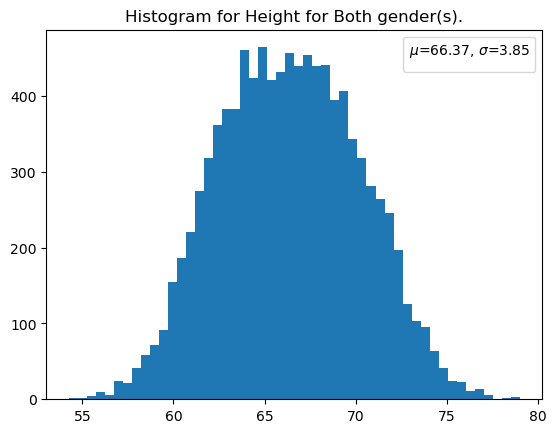

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


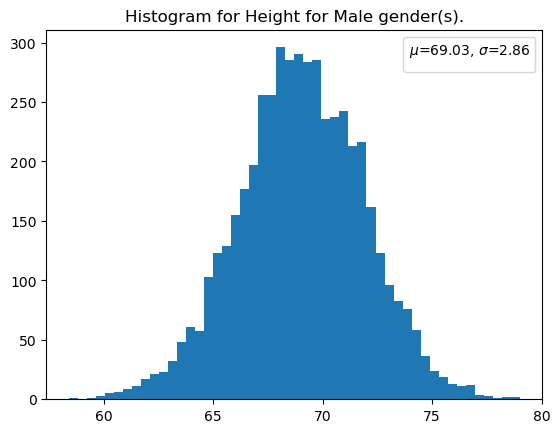

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


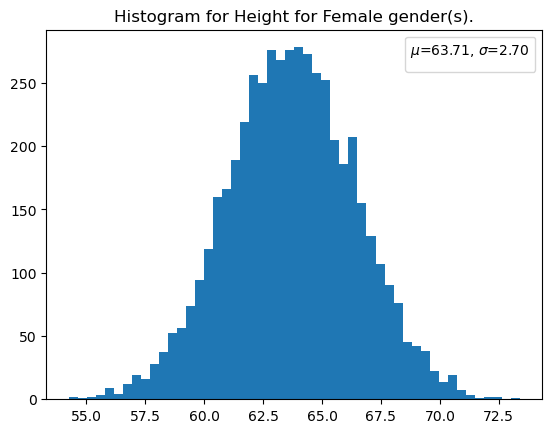

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


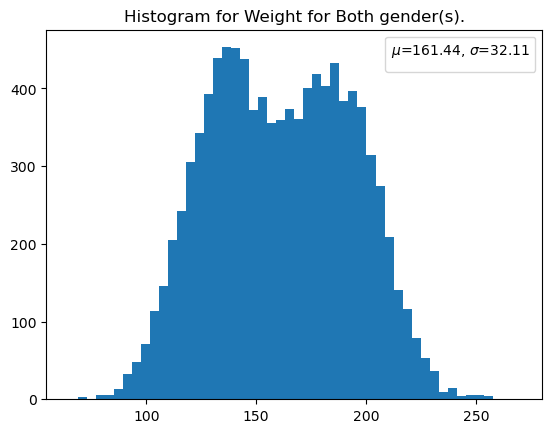

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


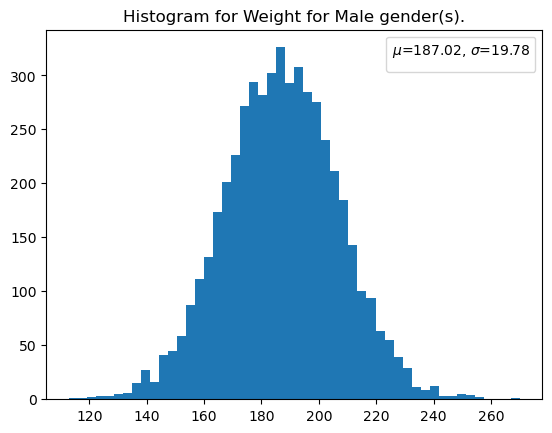

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


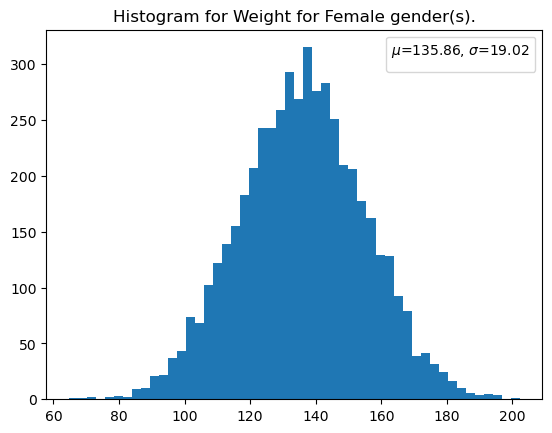

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_calc_plot(gender = 'Both', feature = 'Height'):
    df = pd.read_csv('weight-height.csv')
    #print(df.describe())
    #print(df.head())
    if gender != 'Both':
        if gender in ['Male', 'Female']:
            df = df[df['Gender'] == gender]
        else: raise ValueError(f'Gender {gender} is invalid. Specify either Male or Female')

    if feature not in ['Height', 'Weight']:
        raise ValueError(f'Feature {feature} is invalid. Specify either Height or Weight')

    data = df[feature]
    plt.hist(data, bins=50)
    plt.title(f'Histogram for {feature} for {gender} gender(s).')
    mu = np.mean(data)
    std = np.std(data)
    plt.legend(title=rf'$\mu$={mu:.2f}, $\sigma$={std:.2f}')
    plt.show()


# test
load_calc_plot(gender='Both', feature='Height') # Both genders
load_calc_plot(gender='Male', feature='Height')
load_calc_plot(gender='Female', feature='Height')

load_calc_plot(gender='Both', feature='Weight') # Both genders
load_calc_plot(gender='Male', feature='Weight')
load_calc_plot(gender='Female', feature='Weight')


# 2. z-test

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

def t_test(num_samples=40, gender='Both', feature='Height', alpha=0.05, tail_type='right'):
    print(f'###\nz_test parameters num_samples={num_samples}, gender={gender}, feature={feature}, alpha={alpha}, tail_type={tail_type}')
    df = pd.read_csv('weight-height.csv')
    #print(df.describe())
    #print(df.head())
    if gender != 'Both':
        if gender in ['Male', 'Female']:
            df = df[df['Gender'] == gender]
        else: raise ValueError(f'Gender {gender} is invalid. Specify either Male or Female')

    if feature not in ['Height', 'Weight']:
        raise ValueError(f'Feature {feature} is invalid. Specify either Height or Weight')

    data = df[feature]
    pop_mu = np.mean(data)
    pop_std = np.std(data)
    print(f'population mean={pop_mu:.2f}, population std={pop_std:.2f}')
    
    sample = np.random.choice(data, size=num_samples, replace=False)
    sample_mu = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    print(f'sample mean={sample_mu:.2f}, sample std={sample_std:.2f}')
    z_score = (sample_mu - pop_mu)/ (pop_std/np.sqrt(num_samples))
    p_value = scipy.stats.norm.cdf(z_score)
    print(f'Z-score={z_score:.2f}, p-value={p_value:.4f}')
    reject_null = False
    if tail_type == 'right' and (1 - p_value) < alpha:
        reject_null = True
    elif tail_type == 'left' and p_value < alpha:
        reject_null = True
    elif tail_type == 'both' and (p_value < alpha or p_value > (1 - alpha)):
        reject_null = True
    
    if reject_null:
        print('Reject null hypothesis')
    else:
        print('Failed to reject null hypothesis')

# test
z_test(num_samples=40, gender='Male', feature='Height', alpha=0.05, tail_type='right')

z_test(num_samples=40, gender='Male', feature='Height', alpha=0.2, tail_type='right')

z_test(num_samples=40, gender='Female', feature='Height', alpha=0.05, tail_type='left')

z_test(num_samples=40, gender='Female', feature='Height', alpha=0.2, tail_type='left')

z_test(num_samples=40, gender='Both', feature='Height', alpha=0.05, tail_type='both')

# below test has very high probability of rejection
z_test(num_samples=10, gender='Male', feature='Weight', alpha=0.4, tail_type='both')

z_test(num_samples=40, gender='Male', feature='Weight', alpha=0.05, tail_type='right')

z_test(num_samples=40, gender='Male', feature='Weight', alpha=0.2, tail_type='right')

z_test(num_samples=40, gender='Female', feature='Weight', alpha=0.05, tail_type='left')

z_test(num_samples=40, gender='Female', feature='Weight', alpha=0.2, tail_type='left')

z_test(num_samples=40, gender='Both', feature='Weight', alpha=0.05, tail_type='both')

# below test has very high probability of rejection
z_test(num_samples=10, gender='Male', feature='Weight', alpha=0.4, tail_type='both')


###
z_test parameters num_samples=40, gender=Male, feature=Height, alpha=0.05, tail_type=right
population mean=69.03, population std=2.86
sample mean=68.89, sample std=3.12
Z-score=-0.31, p-value=0.3796
Failed to reject null hypothesis
###
z_test parameters num_samples=40, gender=Male, feature=Height, alpha=0.2, tail_type=right
population mean=69.03, population std=2.86
sample mean=69.20, sample std=2.94
Z-score=0.38, p-value=0.6489
Failed to reject null hypothesis
###
z_test parameters num_samples=40, gender=Female, feature=Height, alpha=0.05, tail_type=left
population mean=63.71, population std=2.70
sample mean=63.83, sample std=2.40
Z-score=0.30, p-value=0.6161
Failed to reject null hypothesis
###
z_test parameters num_samples=40, gender=Female, feature=Height, alpha=0.2, tail_type=left
population mean=63.71, population std=2.70
sample mean=64.79, sample std=2.62
Z-score=2.54, p-value=0.9944
Failed to reject null hypothesis
###
z_test parameters num_samples=40, gender=Both, feature=

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

def t_test(num_samples=40, gender='Both', feature='Height', alpha=0.05, tail_type='right'):
    print(f'###\nt_test parameters num_samples={num_samples}, gender={gender}, feature={feature}, alpha={alpha}, tail_type={tail_type}')
    df = pd.read_csv('weight-height.csv')
    #print(df.describe())
    #print(df.head())
    if gender != 'Both':
        if gender in ['Male', 'Female']:
            df = df[df['Gender'] == gender]
        else: raise ValueError(f'Gender {gender} is invalid. Specify either Male or Female')

    if feature not in ['Height', 'Weight']:
        raise ValueError(f'Feature {feature} is invalid. Specify either Height or Weight')

    data = df[feature]
    pop_mu = np.mean(data)
    print(f'population mean={pop_mu:.2f}')
    
    sample = np.random.choice(data, size=num_samples, replace=False)
    sample_mu = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    print(f'sample mean={sample_mu:.2f}, sample std={sample_std:.2f}')
    z_score = (sample_mu - pop_mu)/ (sample_std/np.sqrt(num_samples))
    p_value = scipy.stats.norm.cdf(z_score)
    print(f'Z-score={z_score:.2f}, p-value={p_value:.4f}')
    reject_null = False
    if tail_type == 'right' and (1 - p_value) < alpha:
        reject_null = True
    elif tail_type == 'left' and p_value < alpha:
        reject_null = True
    elif tail_type == 'both' and (p_value < alpha or p_value > (1 - alpha)):
        reject_null = True
    
    if reject_null:
        print('Reject null hypothesis')
    else:
        print('Failed to reject null hypothesis')

# test
t_test(num_samples=40, gender='Male', feature='Height', alpha=0.05, tail_type='right')

t_test(num_samples=40, gender='Male', feature='Height', alpha=0.2, tail_type='right')

t_test(num_samples=40, gender='Female', feature='Height', alpha=0.05, tail_type='left')

t_test(num_samples=40, gender='Female', feature='Height', alpha=0.2, tail_type='left')

t_test(num_samples=40, gender='Both', feature='Height', alpha=0.05, tail_type='both')

# below test has very high probability of rejection
t_test(num_samples=10, gender='Male', feature='Weight', alpha=0.4, tail_type='both')

t_test(num_samples=40, gender='Male', feature='Weight', alpha=0.05, tail_type='right')

t_test(num_samples=40, gender='Male', feature='Weight', alpha=0.2, tail_type='right')

t_test(num_samples=40, gender='Female', feature='Weight', alpha=0.05, tail_type='left')

t_test(num_samples=40, gender='Female', feature='Weight', alpha=0.2, tail_type='left')

t_test(num_samples=40, gender='Both', feature='Weight', alpha=0.05, tail_type='both')

# below test has very high probability of rejection
t_test(num_samples=10, gender='Male', feature='Weight', alpha=0.4, tail_type='both')
print('#'*25)
print('With smaller number of samples, the probability of rejection increases')

###
t_test parameters num_samples=40, gender=Male, feature=Height, alpha=0.05, tail_type=right
population mean=69.03
sample mean=69.36, sample std=2.54
Z-score=0.84, p-value=0.8003
Failed to reject null hypothesis
###
t_test parameters num_samples=40, gender=Male, feature=Height, alpha=0.2, tail_type=right
population mean=69.03
sample mean=68.92, sample std=3.31
Z-score=-0.20, p-value=0.4208
Failed to reject null hypothesis
###
t_test parameters num_samples=40, gender=Female, feature=Height, alpha=0.05, tail_type=left
population mean=63.71
sample mean=63.10, sample std=3.29
Z-score=-1.17, p-value=0.1202
Failed to reject null hypothesis
###
t_test parameters num_samples=40, gender=Female, feature=Height, alpha=0.2, tail_type=left
population mean=63.71
sample mean=63.66, sample std=2.99
Z-score=-0.10, p-value=0.4612
Failed to reject null hypothesis
###
t_test parameters num_samples=40, gender=Both, feature=Height, alpha=0.05, tail_type=both
population mean=66.37
sample mean=66.38, sample